In [1]:
import ffn

In [2]:
%matplotlib inline

In [3]:
data = ffn.get('agg,hyg,spy,eem,efa', start='2010-01-01', end='2014-01-01')
print(data.head())

                  agg        hyg        spy        eem        efa
Date                                                             
2010-01-04  74.942818  43.466671  89.225403  33.181232  38.846069
2010-01-05  75.283783  43.672871  89.461578  33.422070  38.880318
2010-01-06  75.240242  43.785816  89.524582  33.491989  39.044666
2010-01-07  75.153183  43.962566  89.902481  33.297764  38.894009
2010-01-08  75.196701  44.031300  90.201675  33.561905  39.202148


By default, the data is downloaded from Yahoo! Finance and the Adjusted Close is used as the security's price. Other data sources are also available and you may select other fields as well. Fields are specified by using the following format: {ticker}:{field}. So, if we want to get the Open, High, Low, Close for aapl, we would do the following:

In [4]:
print(ffn.get('aapl:Open,aapl:High,aapl:Low,aapl:Close', start='2010-01-01', end='2014-01-01').head())

            aaplopen  aaplhigh   aapllow  aaplclose
Date                                               
2010-01-04  7.622500  7.660714  7.585000   7.643214
2010-01-05  7.664286  7.699643  7.616071   7.656429
2010-01-06  7.656429  7.686786  7.526786   7.534643
2010-01-07  7.562500  7.571429  7.466071   7.520714
2010-01-08  7.510714  7.571429  7.466429   7.570714


In [5]:
data = ffn.get('dbc', provider=ffn.data.csv, path='test_data.csv', existing=data)
print(data.head())

                  agg        hyg        spy        eem        efa    dbc
Date                                                                    
2010-01-04  74.942818  43.466671  89.225403  33.181232  38.846069  25.24
2010-01-05  75.283783  43.672871  89.461578  33.422070  38.880318  25.27
2010-01-06  75.240242  43.785816  89.524582  33.491989  39.044666  25.72
2010-01-07  75.153183  43.962566  89.902481  33.297764  38.894009  25.40
2010-01-08  75.196701  44.031300  90.201675  33.561905  39.202148  25.38


In [6]:
returns = data.to_log_returns().dropna()
print(returns.head())

                 agg       hyg       spy       eem       efa       dbc
Date                                                                  
2010-01-05  0.004539  0.004733  0.002643  0.007232  0.000881  0.001188
2010-01-06 -0.000579  0.002583  0.000704  0.002090  0.004218  0.017651
2010-01-07 -0.001158  0.004029  0.004212 -0.005816 -0.003866 -0.012520
2010-01-08  0.000579  0.001562  0.003322  0.007901  0.007891 -0.000788
2010-01-11 -0.000772 -0.000893  0.001395 -0.002085  0.008176 -0.003157


Let's look at the different distributions to see how they look.

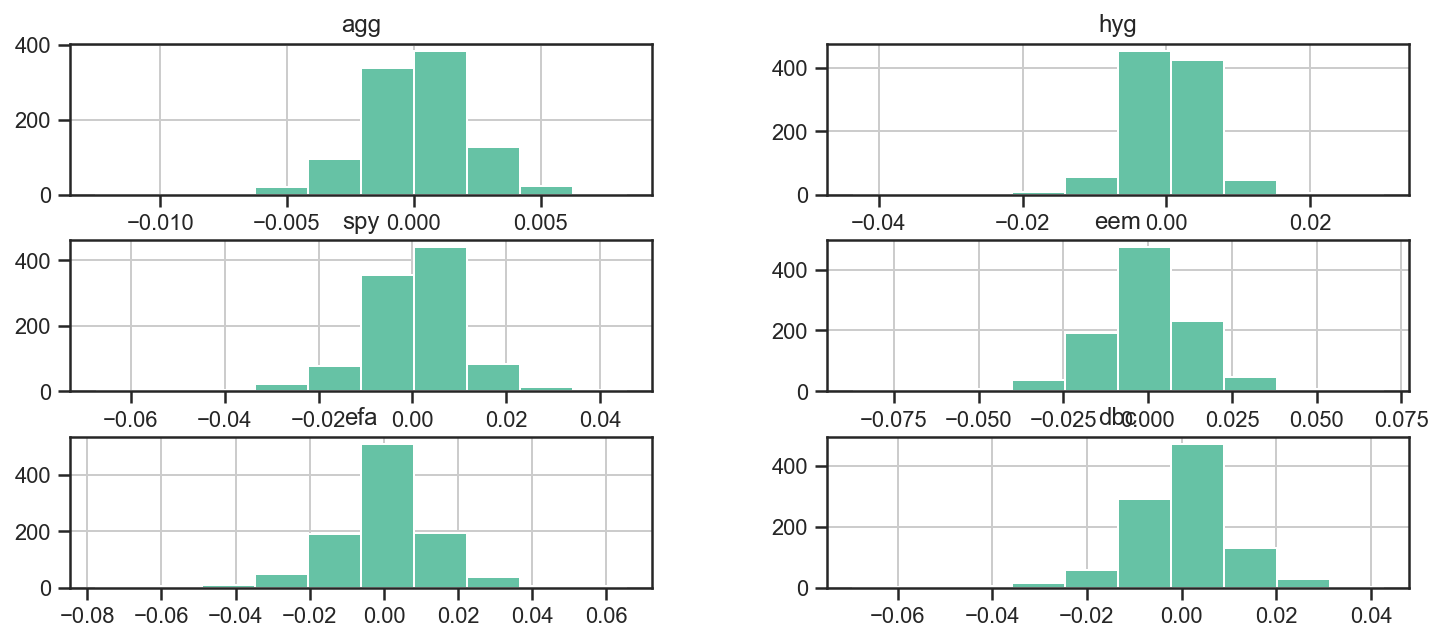

In [7]:
ax = returns.hist(figsize=(12, 5))

We can also use the numerous functions packed into numpy, pandas and the like to further analyze the returns. For example, we can use the corr function to get the pairwise correlations between assets.

In [8]:
returns.corr().as_format('.2f')

,agg,hyg,spy,eem,efa,dbc
agg,1.00,-0.12,-0.33,-0.23,-0.29,-0.18
hyg,-0.12,1.00,0.77,0.75,0.76,0.49
spy,-0.33,0.77,1.00,0.88,0.92,0.59
eem,-0.23,0.75,0.88,1.00,0.90,0.62
efa,-0.29,0.76,0.92,0.90,1.00,0.61
dbc,-0.18,0.49,0.59,0.62,0.61,1.00


Here we used the convenience method as_format to have a prettier output. We could also plot a heatmap to better visualize the results.

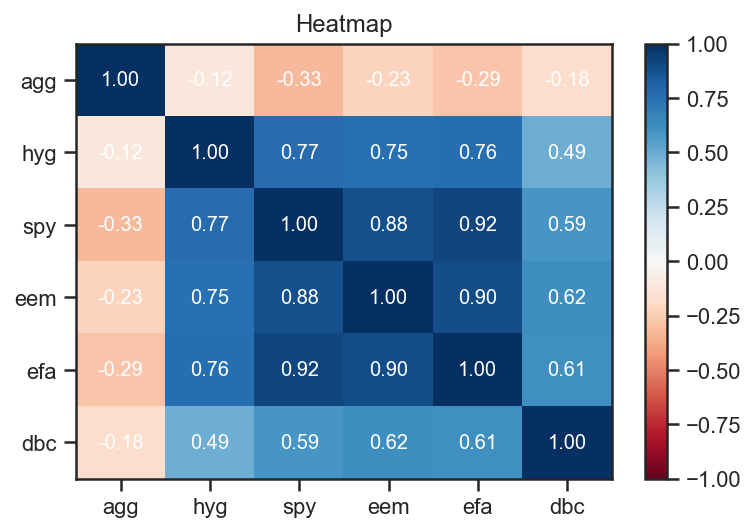

In [9]:
returns.plot_corr_heatmap();

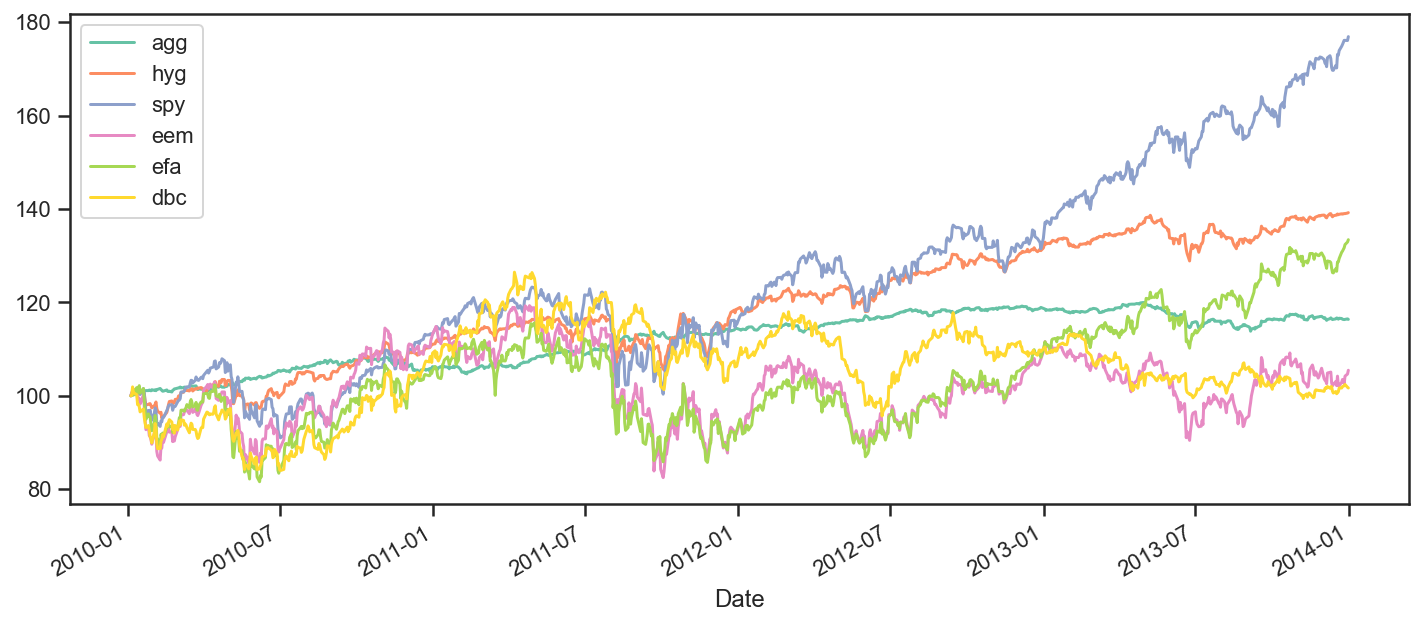

In [10]:
ax = data.rebase().plot(figsize=(12,5))

In [11]:
perf = data.calc_stats()


Now that we have our GroupStats object, we can analyze the performance in greater detail. For example, the **plot** method yields a graph similar to the one above.

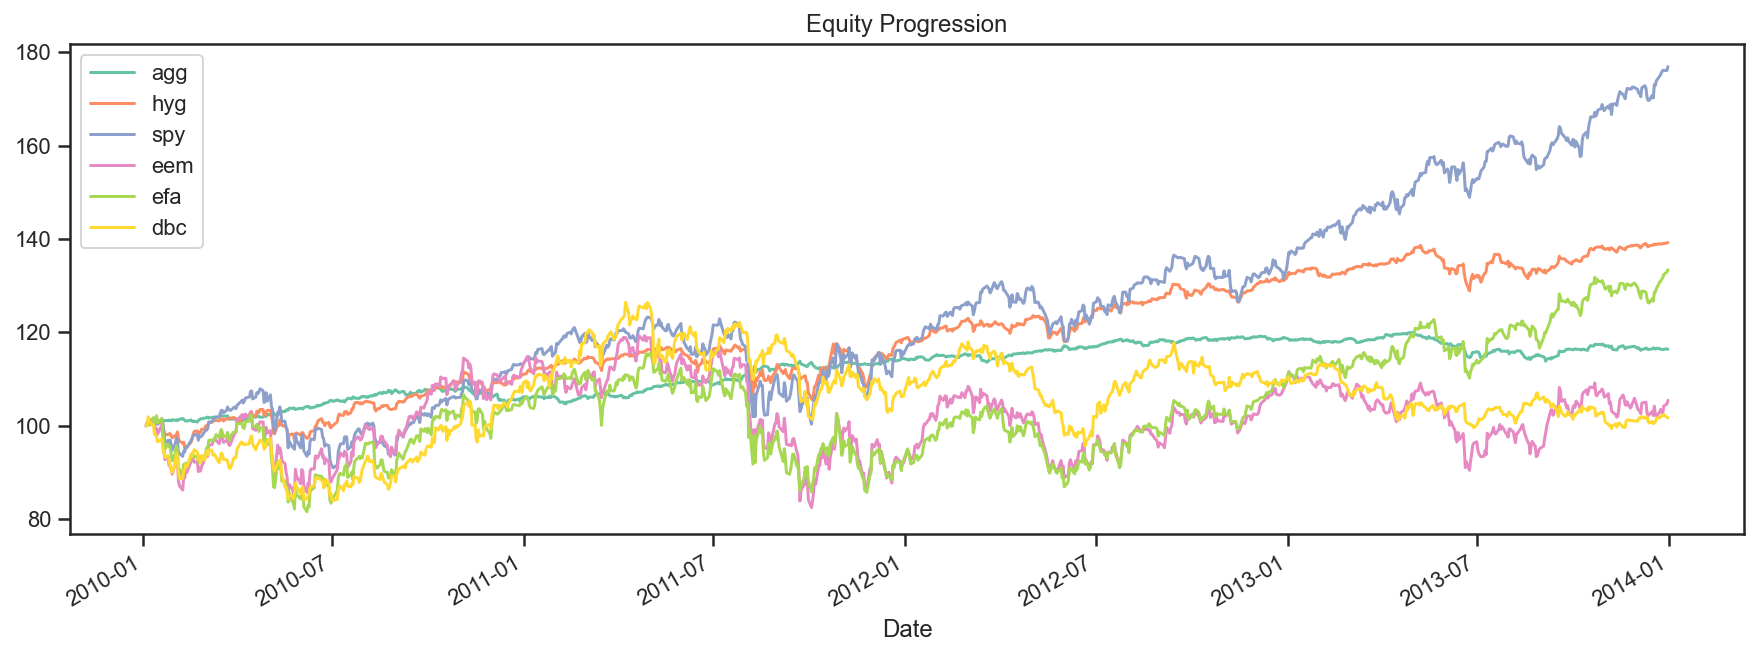

In [12]:
perf.plot();

We can also display a wide array of statistics that are all contained in the PerformanceStats object. This will probably look crappy in the docs, but do try it out in a Notebook. We are also actively trying to improve the way we display this wide array of stats.

In [13]:
print(perf.display())

Stat                 agg         hyg         spy         eem         efa         dbc
-------------------  ----------  ----------  ----------  ----------  ----------  ----------
Start                2010-01-04  2010-01-04  2010-01-04  2010-01-04  2010-01-04  2010-01-04
End                  2013-12-31  2013-12-31  2013-12-31  2013-12-31  2013-12-31  2013-12-31
Risk-free rate       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%

Total Return         16.36%      39.22%      76.92%      5.46%       33.43%      1.66%
Daily Sharpe         1.11        0.97        0.93        0.18        0.44        0.11
Daily Sortino        1.84        1.51        1.48        0.29        0.69        0.17
CAGR                 3.87%       8.65%       15.37%      1.34%       7.50%       0.41%
Max Drawdown         -5.14%      -10.06%     -18.61%     -30.87%     -25.86%     -24.34%
Calmar Ratio         0.75        0.86        0.83        0.04        0.29        0.02

MTD                  -0.56%  

Lots to look at here. We can also access the underlying PerformanceStats for each series, either by index or name.

In [14]:
# we can also use perf[2] in this case
perf['spy'].display_monthly_returns()

  Year    Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct    Nov    Dec    YTD
------  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----
  2010  -5.24   3.12   6.09   1.55  -7.95  -5.17   6.83  -4.5    8.96   3.82   0      6.69  13.14
  2011   2.33   3.47   0.01   2.9   -1.12  -1.69  -2     -5.5   -6.94  10.91  -0.41   1.04   1.89
  2012   4.64   4.34   3.22  -0.67  -6.01   4.06   1.18   2.51   2.54  -1.82   0.57   0.89  15.99
  2013   5.12   1.28   3.8    1.92   2.36  -1.33   5.17  -3      3.16   4.63   2.96   2.59  32.31


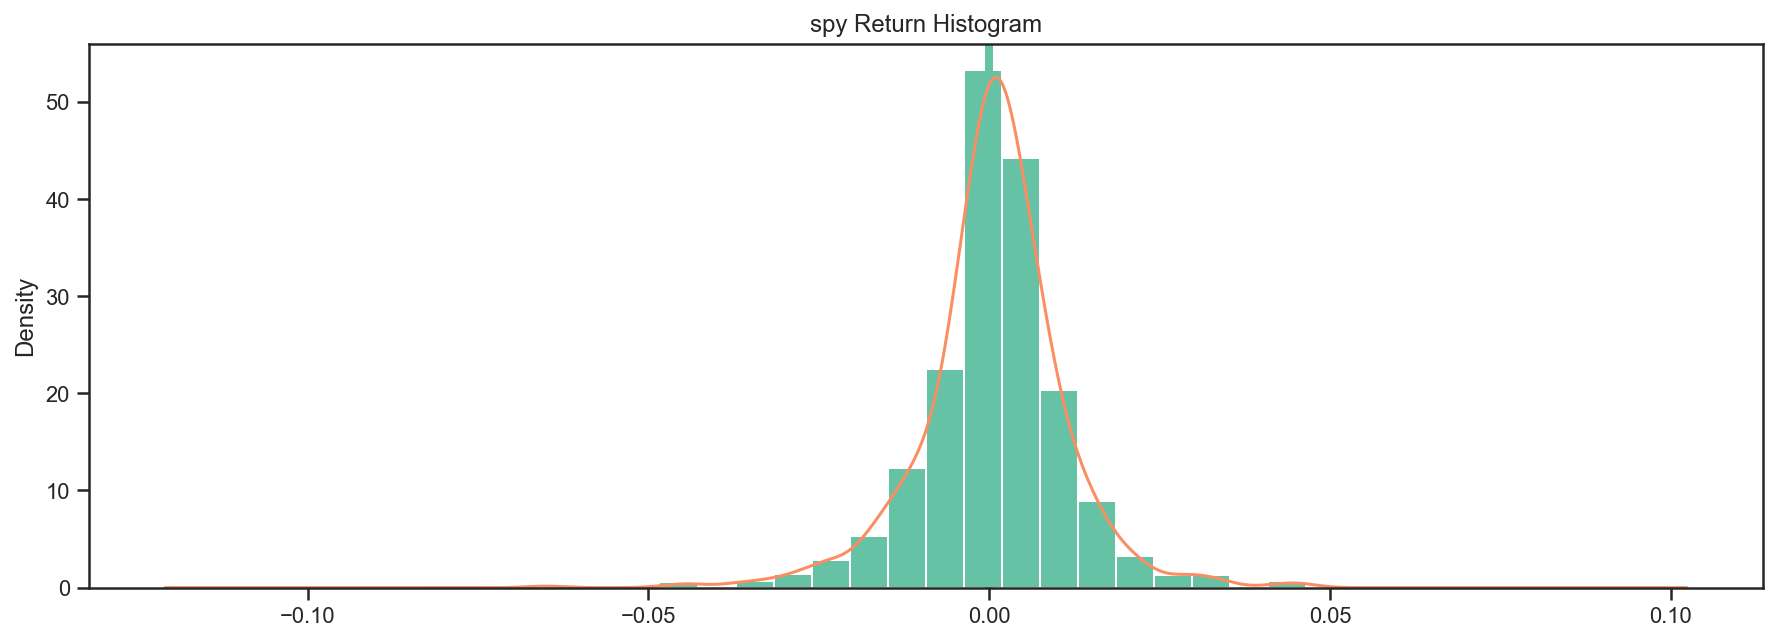

In [15]:
perf[2].plot_histogram();

Most of the stats are also available as pandas objects - see the **stats, return_table, lookback_returns** attributes.

In [16]:
perf['spy'].stats

start                    2010-01-04 00:00:00
end                      2013-12-31 00:00:00
rf                                       0.0
total_return                        0.769155
cagr                                 0.15375
max_drawdown                       -0.186055
calmar                              0.826367
mtd                                 0.025926
three_month                         0.105247
six_month                           0.163183
ytd                                 0.323077
one_year                            0.323077
three_year                           0.16066
five_year                                NaN
ten_year                                 NaN
incep                                0.15375
daily_sharpe                         0.93439
daily_sortino                       1.478916
daily_mean                          0.157279
daily_vol                           0.168323
daily_skew                         -0.388777
daily_kurt                          4.028481
best_day  

In [17]:
returns.calc_mean_var_weights().as_format('.2%')

agg    79.52%
hyg     6.47%
spy    14.01%
eem     0.00%
efa     0.00%
dbc     0.00%
dtype: object

Some other interesting functions are the clustering routines, such as a Python implementation of David Varadi's Fast Threshold Clustering Algorithm (FTCA)

In [18]:
returns.calc_ftca(threshold=0.8)

{1: ['eem', 'spy', 'efa'], 2: ['agg'], 3: ['dbc'], 4: ['hyg']}